In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
y_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 1)

In [3]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],3)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],3)

print(x_train.shape, x_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3)


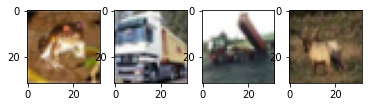

In [4]:
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(x_train[i])
plt.show()

In [5]:
#y라벨 one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test_s = tf.keras.utils.to_categorical(y_test)

print(y_train.shape, y_test_s.shape)

(50000, 10) (10000, 10)


In [6]:
# normalizaiton
print(x_train.max(), x_test.max())
x_train = x_train/ x_train.max()
x_test = x_test/ x_test.max()
print(x_train.max(), x_test.max())

255 255
1.0 1.0


In [20]:
# model1 ( kernel+initializer, callback,Dropout)   

input_layer = tf.keras.Input(shape = (32,32,3))
x = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_normal())(input_layer)  # 32 channel kernel_size =32 conv2d relu
x = tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_normal())(x)  # 32 channel kernel_size =32 conv2d relu
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x) 


x = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_normal())(x)
x = tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_normal())(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Dropout(0.3)(x) 

x = tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_normal())(x)
x = tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_normal())(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Dropout(0.4)(x) 

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu',kernel_initializer= tf.keras.initializers.he_normal())(x)
x = tf.keras.layers.Dropout(0.5)(x)
output_layer = tf.keras.layers.Dense(10,activation = 'softmax',kernel_initializer= tf.keras.initializers.he_normal())(x)


model = tf.keras.Model(inputs = [input_layer], outputs = [output_layer])
model.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 64)        3692

In [21]:
# mdoel compile

loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam()
metric = tf.keras.metrics.categorical_accuracy

model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])



In [22]:
# 모델 최적화 설정
import os
MODEL_DIR = '/content/drive/MyDrive/YGL/10.28/cifar10_model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath= MODEL_DIR + '/{epoch:02d}-{val_loss:.4f}.hdf5'
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',verbose = 1,save_best_only= True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 7)]

In [26]:
history = model.fit(x_train,y_train,validation_split = 0.1, shuffle = True, epochs = 50,batch_size = 400,callbacks = callback_list)

113/113 [==============================] - 9s 76ms/step - loss: 0.7301 - categorical_accuracy: 0.7436 - val_loss: 0.6423 - val_categorical_accuracy: 0.7782

Epoch 00011: val_loss improved from 0.68029 to 0.64234, saving model to /content/drive/MyDrive/YGL/10.28/cifar10_model/11-0.6423.hdf5
Epoch 12/50
113/113 [==============================] - 9s 76ms/step - loss: 0.7084 - categorical_accuracy: 0.7512 - val_loss: 0.6592 - val_categorical_accuracy: 0.7738

Epoch 00012: val_loss did not improve from 0.64234
Epoch 13/50
113/113 [==============================] - 9s 76ms/step - loss: 0.6772 - categorical_accuracy: 0.7620 - val_loss: 0.6428 - val_categorical_accuracy: 0.7790

Epoch 00013: val_loss did not improve from 0.64234
Epoch 14/50
113/113 [==============================] - 9s 76ms/step - loss: 0.6458 - categorical_accuracy: 0.7711 - val_loss: 0.6382 - val_categorical_accuracy: 0.7788

Epoch 00014: val_loss improved from 0.64234 to 0.63819, saving model to /content/drive/MyDrive/YGL/1

In [27]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test_s)[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.5533 - categorical_accuracy: 0.8249

 Test Accuracy: 0.8249


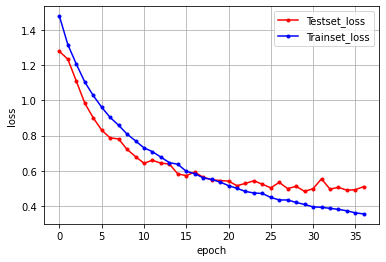

In [28]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [29]:
class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                )

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

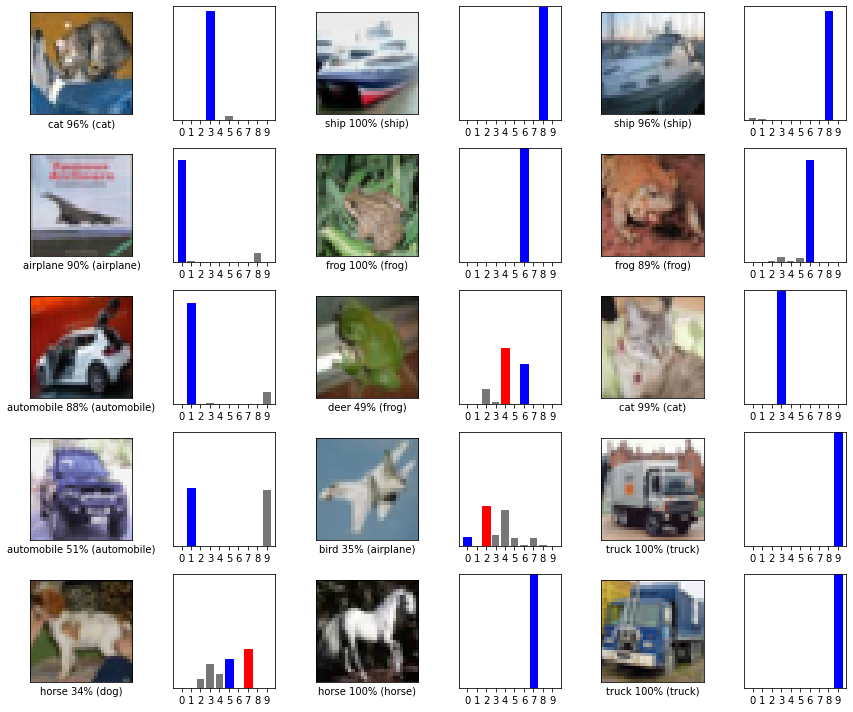

In [30]:
predictions  = model.predict(x_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

# model 2 use BatchNomalization

In [31]:
# model 2 => use  Batchnomalizaiton
# model1 ( kernel+initializer, callback,Dropout)   

input_layer = tf.keras.Input(shape = (32,32,3))
x = tf.keras.layers.Conv2D(32,3,activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_uniform())(input_layer)  # 32 channel kernel_size =32 conv2d relu
x = tf.keras.layers.Conv2D(32,3,activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_uniform())(x)  # 32 channel kernel_size =32 conv2d relu
x = tf.keras.layers.BatchNormalization()(x) 
x = tf.keras.layers.MaxPool2D((2,2))(x)

x = tf.keras.layers.Conv2D(64,3,activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_uniform())(x)
x = tf.keras.layers.Conv2D(64,3,activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_uniform())(x)
x = tf.keras.layers.BatchNormalization()(x) 
x = tf.keras.layers.MaxPool2D((2,2))(x)

x = tf.keras.layers.Conv2D(128,3,activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_uniform())(x)
x = tf.keras.layers.Conv2D(128,3,activation = 'relu',padding = 'same',kernel_initializer= tf.keras.initializers.he_uniform())(x)
x = tf.keras.layers.BatchNormalization()(x) 
x = tf.keras.layers.MaxPool2D((2,2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = 'relu',kernel_initializer= tf.keras.initializers.he_uniform())(x)
x = tf.keras.layers.BatchNormalization()(x) 
output_layer = tf.keras.layers.Dense(10,activation = 'softmax',kernel_initializer= tf.keras.initializers.he_uniform())(x)


model2 = tf.keras.Model(inputs = [input_layer], outputs = [output_layer])
model2.summary()

#plot


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 64)        3692

In [32]:
model2.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])


In [72]:
MODEL_DIR = '/content/drive/MyDrive/YGL/10.28/cifar10_model2'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath= MODEL_DIR + '/{epoch:02d}-{val_loss:.4f}.hdf5'
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',verbose = 1,save_best_only= True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 7)]

In [86]:
history = model2.fit(x_train,y_train,validation_split = 0.1, shuffle = True, epochs = 50,batch_size = 300,callbacks = callback_list)

Epoch 1/50
150/150 [==============================] - 6s 33ms/step - loss: 1.8266 - categorical_accuracy: 0.3778 - val_loss: 2.1014 - val_categorical_accuracy: 0.2528

Epoch 00001: val_loss did not improve from 0.57896
Epoch 2/50
150/150 [==============================] - 5s 30ms/step - loss: 1.3774 - categorical_accuracy: 0.5173 - val_loss: 1.6676 - val_categorical_accuracy: 0.3946

Epoch 00002: val_loss did not improve from 0.57896
Epoch 3/50
150/150 [==============================] - 5s 30ms/step - loss: 1.2451 - categorical_accuracy: 0.5648 - val_loss: 1.3393 - val_categorical_accuracy: 0.5238

Epoch 00003: val_loss did not improve from 0.57896
Epoch 4/50
150/150 [==============================] - 5s 30ms/step - loss: 1.1578 - categorical_accuracy: 0.5979 - val_loss: 1.2257 - val_categorical_accuracy: 0.5712

Epoch 00004: val_loss did not improve from 0.57896
Epoch 5/50
150/150 [==============================] - 5s 30ms/step - loss: 1.0915 - categorical_accuracy: 0.6222 - val_loss:

In [74]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test_s)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.6273 - categorical_accuracy: 0.7955

 Test Accuracy: 0.7955


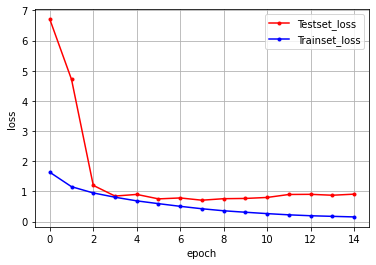

In [75]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


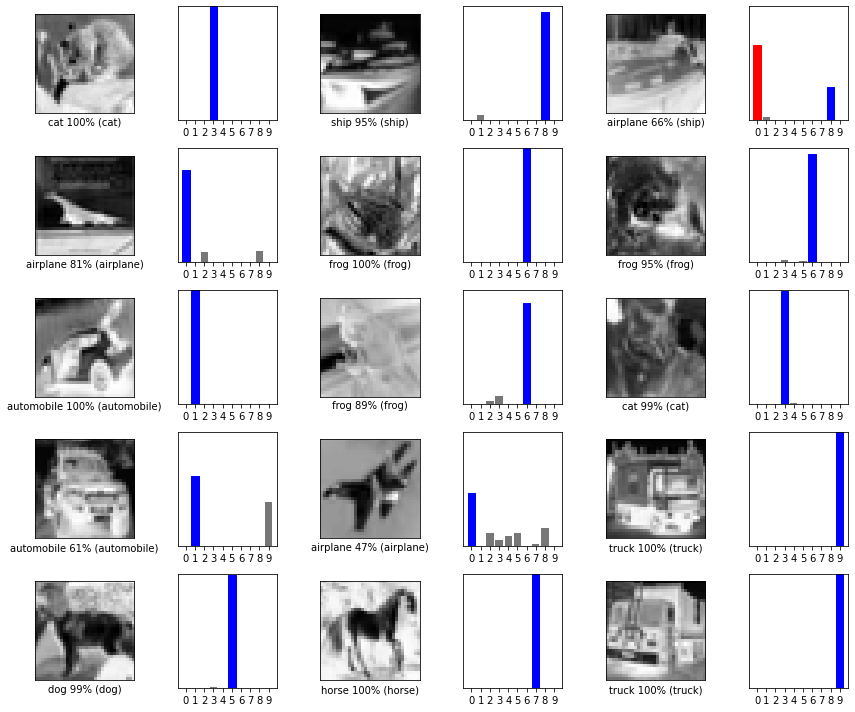

In [76]:
predictions  = model2.predict(x_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [33]:
!nvidia-smi

Thu Oct 28 08:48:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    74W / 149W |   4381MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------